Введение

Мы уже учились выкачивать Интернет. Однако этот способ добычи текстов (шахтёрская терминология тут неслучайна, по-английски и интеллектуальный анализ текста, и процесс нахождения данных для этого анализа называется mining) подходит не для всех сайтов. Некоторые ресурсы либо прямо запрещают автоматическое обращение к своему контенту, потому что это для них невыгодно (зарабатывают-то они на рекламе, которую показывают людям, а с роботов отдача нулевая) и излишне загружает сервера, либо просто организовывают свой сайт так, чтобы сама по себе загрузка страницы клиентом не давала ничего существенного, а всё нужное подгружалось уже потом с помощью программ на языке JavaScript. Запускать такие программы из питона несколько сложнее, так что всё это создаёт для компьютерного лингвиста дополнительные трудности. К таким сайтам относятся, например, и социальные сети: VK, Facebook, Instagram и пр.

Однако многие крупные ресурсы либо по доброте душевной, либо потому что это даёт и им кое-какую выгоду, встраивают в свою систему API: application programming interface, то есть средство для автоматизированного обращения к приложению (сайту). Через такую систему можно решать иногда довольно широкий спектр задач. Может быть, всё, что таким образом можно сделать, нам не нужно. Но вот получать тексты было бы полезно: в тех же социальных сетях люди пишут, во-первых, много (а для компьютерного лингвиста чем больше данных, тем лучше), во-вторых, на таком варианте языка, который приближен к разговорному (другие способы намайнить себе текстов такого рода гораздо затратнее). Попробуем познакомиться с инструментарием API на примере vk.com
Как выглядит обращение к VK API

В принципе, VK API, как следует из документации придуман не для выкачивания текстов, а для создания веб-приложений на сторонних сайтах, которые бы могли взаимодействовать с vk.com. Но это всё равно не мешает нам воспользоваться такой возможностью в своих целях.

Практически всё выглядит следующим образом. На сайте vk.com есть специальные страницы, которые не предназначены для того, чтобы их открывать браузером, они ожидают именно автоматического обращения. Что значит автоматическое обращение? Это то самое, что мы проходили, когда учились выкачивать Интернет: программа на питоне (но в теории может быть и не на питоне) посылает серверу запрос, договаривается с ним и получает ответ. Вспомним, что для произвольной страницы это выглядит так:


In [3]:
import urllib.request  # импортируем модуль 
req = urllib.request.Request('https://habrahabr.ru/') # посылаем запрос
with urllib.request.urlopen(req) as response: # открываем соединение с сайтом
   html = response.read().decode('utf-8') # "читаем" ответ сервера (сайта) в переменную html
print(html[:210])

<!DOCTYPE html>
<html lang="ru" class="no-js">
  <head>
    <meta http-equiv="content-type" content="text/html; charset=utf-8" />
<meta content='width=1024' name='viewport'>
<title>Лучшие публикации за сутки / 


In [4]:
import urllib.request  # импортируем модуль 
req = urllib.request.Request('https://api.vk.com/method/wall.get?owner_id=1&count=2&v=5.92&access_token=8423c2448423c2448423c244d08441f2a1884238423c244dee1644d9e90529494134bf8') 
response = urllib.request.urlopen(req) # да, так тоже можно, не обязательно делать это с with, как в примере выше
result = response.read().decode('utf-8')

In [5]:
import urllib.request  # импортируем модуль 
import json
req1 = urllib.request.Request('https://api.vk.com/method/wall.getComments?owner_id=1&post_id=2442097&count=3&need_likes=1&v=5.92&access_token=8423c2448423c2448423c244d08441f2a1884238423c244dee1644d9e90529494134bf8') 
response1 = urllib.request.urlopen(req1) # да, так тоже можно, не обязательно делать это с with, как в примере выше
result1 = response1.read().decode('utf-8')
data1 = json.loads(result1) 
data1['response']['items']

[{'id': 2442098,
  'parents_stack': [],
  'date': 1525805968,
  'thread': {'count': 124,
   'items': [],
   'can_post': True,
   'show_reply_button': True,
   'groups_can_post': True},
  'deleted': True},
 {'id': 2442100,
  'from_id': 243752050,
  'post_id': 2442097,
  'owner_id': 1,
  'parents_stack': [],
  'date': 1525805970,
  'text': 'Ну чо пасаны,цифровое сопротивление\nUPD:Го 1К лайков? :D\nUPDD:Чувак сверху спиздил с сохраненки.крыса!!!',
  'likes': {'count': 2240, 'user_likes': 0, 'can_like': 1},
  'attachments': [{'type': 'photo',
    'photo': {'id': 456244482,
     'album_id': -5,
     'owner_id': 243752050,
     'sizes': [{'type': 'm',
       'url': 'https://sun1-16.userapi.com/c850632/v850632550/9685d/LbqEM027b5A.jpg',
       'width': 119,
       'height': 130},
      {'type': 'o',
       'url': 'https://sun1-23.userapi.com/c850632/v850632550/96861/wapqg-NHEdE.jpg',
       'width': 130,
       'height': 142},
      {'type': 'p',
       'url': 'https://sun1-14.userapi.com/c8



Для взаимодействия с vk.com нам потребуется тот же самый модуль urllib.request, а страницы, к которым мы будем обращаться, описаны в документации VK API. Там же есть инструкция по работе с VK API для начинающих разработчиков.

Но есть одна хитрость. Она в том, что страницы, к которым мы будем обращаться, ожидают не просто обращения, а передачи определённых параметров. Это логично: мы же должны сказать системе, что мы точно хотим сделать. Например, мы хотим получить какое-то количество записей со стены определённого пользователя. Тогда нужно сообщить, какой это пользователь. Сайт vk.com много чего может, но не читать наши мысли.
Передача параметров

Как передать эти параметры сайту? Для этого тоже есть стандартные средства, но уже не придуманные разработчиками сайта, а прописанные в протоколе HTTP давным-давно. Выглядит это так. В строке адреса, например, в браузере мы сначала пишем имя протокола (http или https), которое отделяется от всего, что идёт дальше последовательностью "://", потом пишется доменное имя (по сути, основной адрес сайта), к которому мы хотим обратиться (например, vk.com, после точки следует т.н. доменная зона), после косой черты далее следует адрес собственно страницы на сайте, к которой мы хотим обратиться: https://api.vk.com/method/wall.get А вот после адреса страницы мы можем в той же адресной строке передать уже собственно параметры. Место, где передаются параметры, отделяется от адреса страницы с помощью знака вопроса, а сами выглядят как пары ключ-значение, где ключ отделяется от значения с помощью знака равно: https://api.vk.com/method/wall.get?owner_id=1 Здесь есть параметр owner_id, который указывает на пользователя, стену которого мы хотим скачать, и значение этого параметра 1, то есть речь идёт об основателе соцсети и первом её пользователе Павле Дурове, страница которого открывается по адресу https://vk.com/id1. Такой номер, то есть уникальный идентификатор (id) есть у каждого пользователя и у каждого сообщества.

Если есть необходимость передать сразу несколько параметров, то они должны отделяться друг от друга знаком "аперсанд", то есть &: https://api.vk.com/method/wall.get?owner_id=1&count=10. Здесь появился второй параметр count, который говорит, что мы хотим скачать именно 10 записей со стены пользователя.

Так же выглядит и строка адреса при поисковом запросе, например, в Яндексе: https://yandex.ru/search/?text=соцсети
Авторизация

Чтобы получить доступ к контенту Вконтакте, пользователь должен авторизоваться. То же самое и с приложением: мы не можем отправлять запросы просто так, для этого нужно зарегистрировать приложение вот здесь и получить т.н. сервисный токен -- ключ доступа, по которому VK API будет отдавать нам информацию. Это сделано для защиты данных.

Сервисный токен выглядит примерно так: 8423c2448423c2448423c244d08441f2a1884238423c244dee1644d9e90529494134bf8. Он действует сутки, после чего нужно получить новый токен на странице настроек приложения. Токен указывается в параметре access_token для любого запроса.
Версии API

VK API постоянно развивается: вместе с появлением новых функций в самой соцсети появляются и новые методы для программной работы с ними. Версию API также необходимо указывать в любом запросе; за это отвечает параметр v, например v=5.52. Последня версия на данный момент -- 5.74, а полный их список можно посмотреть здесь.
Пробуем!

Итак, поехали, давайте скачаем две записи со стены Дурова. Чтобы скачивать записи со стен, у нас есть специальный метод VK API, он называется wall.get и выглядит как специальная страница на сайте vk.com: https://api.vk.com/method/wall.get Как работает этот метод, рассказано на его странице в документации: https://vk.com/dev/wall.get Среди полезного там есть список обязательных параметров, которые нужно передать методу, чтобы он сработал.

Часть адреса https://api.vk.com/method/ можно запомнить. Все остальные методы просто добавляются к нему: https://api.vk.com/method/wall.getComments, https://api.vk.com/method/wall.getById и т.д.

Полный список методов можно посмотреть вот тут.


Посмотрим, что получилось.

NB! Если вы работаете в IDLE, то наверняка при попытке распечатать текст со смайликами получите ошибку "UCS-2 codec can't encode byte in position X", потому что кодировка UCS-2 (она же UTF-16), которая используется для стандартного вывода текста в IDLE, не поддерживает смайлики. Что делать?

    Не печатать посты со смайликами (читать и обрабатывать такой текст по-прежнему можно)
    Пользоваться чем-то другим вместо IDLE (например, Jupyter Notebook)



In [6]:
print(result)

{"response":{"count":283,"items":[{"id":2442097,"from_id":1,"owner_id":1,"date":1525805964,"post_type":"post","text":"Иногда говорят, что Telegram был заблокирован в России, так как “закон есть закон”. Однако Telegram заблокирован в России как раз вопреки главному закону страны – Конституции. Решения судов и законы, противоречащие Конституции, не имеют силы. А это значит, что и сама блокировка Telegram незаконна. \n\nЕсли бы ФСБ ограничилась запросом информации о нескольких террористах, то ее требование вписывалось бы в рамки Конституции. Однако речь идет о передаче универсальных ключей шифрования с целью последующего бесконтрольного доступа к переписке неограниченного круга лиц. A это – прямое нарушение 23-й статьи Конституции о праве каждого на тайну переписки.\n\nПо этой причине юристы из “Агоры” сегодня обжаловали решение Верховного суда России о законности приказа ФСБ. Надеюсь, власти России откажутся от языка неисполнимых ультиматумов, на котором сегодня ведется диалог с технолог



Если вглядеться, то выйдет, что это просто питоновский словарь с ключом "response" и значением в виде другого словаря. Но так ли это?


In [7]:
type(result)


str

Нет, оказывается, это просто строка :( Неужели её ещё нужно парсить? Вспоминать регулярные выражения? Нет! Вспомним лучше формат json и модуль для работы с ним.

In [8]:
import json
data = json.loads(result) 
print(type(data))


<class 'dict'>




Теперь, кажется, всё в порядке. Собственно, на том же занятии про json мы уже работали с api, только другого сайта: API GitHub.
Извлечение информации

Мы получили какой-то ответ от API и даже превратили его в структуру данных, с которой удобно работать в питоне. Но что в этой структуре лежит? Обычно это json, в котором всё устроено как вложенные друг в друга словари и массивы, где ключи -- это какое-то общепонятное слово, а значение -- собственно информация. Подробно это описано в документации к API, но часто всё понятно и без дополнительных объяснений. Например, вот тут:

{

    "post_type": "post",

    "text": "К 1 апреля в Трижды Краснознаменный завезли новые стикеры.",

    "attachment":

        {

        "type":"photo"

...

ключ post_type говорит, что это за тип записи, а ключ attachment содержит информацию о том, что к этому посту приложено. Оказывается, фото (точнее, просто какая-то картинка).

Попробуем это извлечь. В переменной data лежит словарь со всеми данными, которые получили в ответ на запрос: ключ в этом словаре -- response, а значение -- другой словарь с параметрами ответа. В этом словаре заяц, в зайце -- утка, в утке -- яйцо, в яйце -- игла, в игле -- смерть разработчика одним из ключей является items, а его значение -- список с нашими постами и всех их параметрами (ну наконец-то!)

Верхний пост на стене Дурова -- это репост с множеством картинок и комментариев, поэтому информации о нем так много. Второй пост -- это запись самого Дурова.


In [9]:
data['response']['items']


[{'id': 2442097,
  'from_id': 1,
  'owner_id': 1,
  'date': 1525805964,
  'post_type': 'post',
  'text': 'Иногда говорят, что Telegram был заблокирован в России, так как “закон есть закон”. Однако Telegram заблокирован в России как раз вопреки главному закону страны – Конституции. Решения судов и законы, противоречащие Конституции, не имеют силы. А это значит, что и сама блокировка Telegram незаконна. \n\nЕсли бы ФСБ ограничилась запросом информации о нескольких террористах, то ее требование вписывалось бы в рамки Конституции. Однако речь идет о передаче универсальных ключей шифрования с целью последующего бесконтрольного доступа к переписке неограниченного круга лиц. A это – прямое нарушение 23-й статьи Конституции о праве каждого на тайну переписки.\n\nПо этой причине юристы из “Агоры” сегодня обжаловали решение Верховного суда России о законности приказа ФСБ. Надеюсь, власти России откажутся от языка неисполнимых ультиматумов, на котором сегодня ведется диалог с технологическими ком

Теперь посмотрим текст второго поста.

In [10]:
data['response']['items'][1]['text']


'Михаил Светов, организатор прошедшего митинга за свободу интернета, объявил конкурс на наиболее вдохновляющую обработку видеоматериалов с митинга. Призовой фонд – 1 биткоин.\n\n#digitalresistance'



Получилось! А как достать текст репоста?

    Вся информация об оригинальном посте, который репостнул наш пользователь, находится в параметре copy_history. Это ключ словаря, который мы достаем из списка items по индексу.
    Значение этого ключа - тоже список, в котором будут "уровни репоста" (т.е. просто репост, репост репоста, репост репоста репоста и т.д.). У нас репост оригинальной записи, т.е. первого уровня, так что пишем индекс 0.
    Ну а по этому индексу лежит словарь со всеми параметрами, из которых нам нужен уже знакомый text.



In [11]:
#data['response']['items'][18]['copy_history'][0]['text']


In [12]:
from datetime import datetime

unixtime = data['response']['items'][1]['date'] # извлекаем из информации о посте timestamp
utc = datetime.fromtimestamp(unixtime) # конвертируем unixtime в utc
print(utc)

2018-05-03 16:05:53


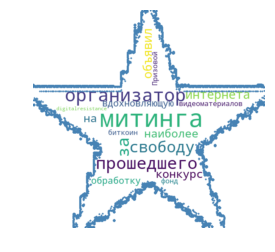

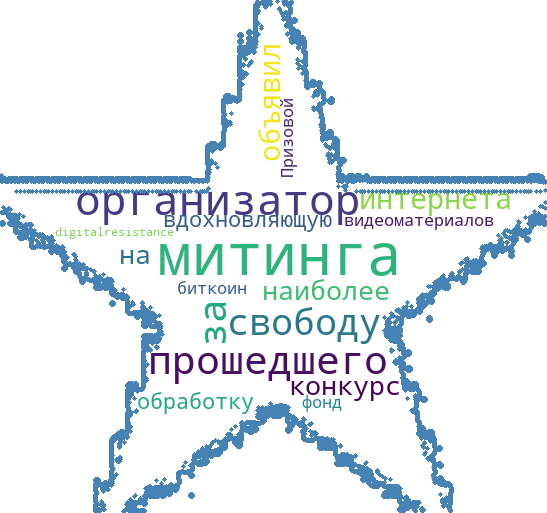

In [13]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

text = data['response']['items'][1]['text']

# картинка, в форме которой будет облако слов (это необязательно, по умолчанию — прямоугольник)
# важно: картинка для маски должна быть в jpeg
comment_mask = np.array(Image.open("C:\!!_info_!!\Desktop\Free_Blue_Star.jpg"))

stopwords = set(STOPWORDS)
stopwords.add("Светов")
stopwords.add("Михаил")

cloud = WordCloud(background_color="white", max_words=2000, mask=comment_mask, stopwords=stopwords, contour_width=5, contour_color='steelblue')


# генерируем
cloud.generate(text)

# визуализируем
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# store to file
cloud.to_file("post_cloud.png")
# реальный размер картинки
Image.open("post_cloud.png")


Задания
1. Смотрим на другие параметры метода wall.get

Что ещё можно передать методу wall.get, кроме id пользователя и числа постов? Как это применить?
2. Скачиваем комментарии

Комментарии к постам скачиваются с помощью другого метода: https://vk.com/dev/wall.getComments В документации по ссылке перечислены обязательные параметры, а также приведен пример запроса и ответа на него. В документации есть такое описание для любого метода.

Ему нужно передавать идентификаторы записи, комментарии к которой мы хотим получить (эти идентификаторы нам поставляет метод wall.get). Обратите внимание, что VK API позволяет за одно обращение скачать не больше 100 записей и 100 комментариев. Дурова комментируют много, так что всё сразу достать не получится. Но если немного подумать, то можно сделать и это. Как?

Если ваша собственная стена открыта и записи там доступны без авторизации, можете скачать её, и посчитать, кто вас больше комментирует. Какие у комментаторов самые частотные слова?

NB! id поста -- это целое положительное число, которое можно узнать, посмотрев прямую ссылку на пост (чтобы это сделать, нужно нажать на дату). Например, в посте по ссылке https://vk.com/id1?w=wall1_2083400 id -- это 2083400.


Скачать список пользователей, состоящих в группе https://vk.com/dormitory8hse. Нарисовать столбчатую диаграмму, показывающую, сколько человек из каких городов состоит в группе.
В той же группе скачать 1000 записей со стены. Нарисовать график, показывающий, сколько записей было написано в каждый час. Вывести записи, набравшие наибольшее количество лайков и с наибольшим числом комментариев.
Скачать список пользователей, состоящих в группе https://vk.com/hse_university. Нарисовать столбчатую диаграмму, показывающую распределение пользователей по их году рождения.
Найти, сколько в этой группе состоит пользователей, чьим университетом является не Вышка. Нарисовать диаграмму, показывающую распределение этих пользователей по университетам (если все не влезут, то 10 самых частотных университетов).
Собрать корпус записей в группе Вышки и комментариев к ним (можно взять первые 10000 записей). Найти самые частотные биграммы в этом корпусе.